# Tutorial: Visualize Data

This tutorial demonstrates how to visualize images from (TIFF and PNG) the Dendritic Consortium dataset, hosted on AWS S3.

---

## Python

Replace `file_path` with the file path you want from the GUI database.

**Install requirements**:

```bash
pip install boto3

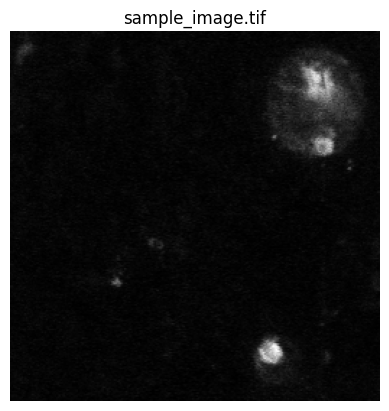

In [2]:
import boto3
from botocore import UNSIGNED
from botocore.client import Config
from io import BytesIO
from PIL import Image
import tifffile
import matplotlib.pyplot as plt
import os

file_path = 'yuste/20250620/image/raw/sample_image.tif'

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
bucket = 'dendriticconsortium'

response = s3.get_object(Bucket=bucket, Key=file_path)
img_bytes = BytesIO(response['Body'].read())
ext = os.path.splitext(file_path)[-1].lower()

if ext == '.tif' or ext == '.tiff':
    img = tifffile.imread(img_bytes)
    plt.imshow(img, cmap='gray')
elif ext == '.png' or ext == '.jpg' or ext == '.jpeg':
    img = Image.open(img_bytes)
    plt.imshow(img)
else:
    raise ValueError("Unsupported file format")

plt.axis('off')
plt.title(f'{os.path.basename(file_path)}')
plt.show()

### ⚠️ Note
While you can download image files using the AWS CLI ([see tutorial](./01_download_data.ipynb)), they cannot be directly visualized in the terminal. You will need to open them using an image viewer or visualize them programmatically with tools like Python.